In [1]:
import pandas as pd
import os

url = "https://www.pro-football-reference.com/years/2024/passing.htm"

tables = pd.read_html(url)

df = tables[0]
df = df.drop(columns=["Rk", "Player", "Team", "Pos", "QBrec", "4QC", "GWD", "Awards"])

print(df.corr())

            Age         G        GS       Cmp       Att      Cmp%       Yds  \
Age    1.000000 -0.048381 -0.095481  0.067517  0.058461 -0.034212  0.062366   
G     -0.048381  1.000000  0.713605  0.405287  0.398750 -0.095192  0.416711   
GS    -0.095481  0.713605  1.000000  0.648588  0.645932 -0.056961  0.657481   
Cmp    0.067517  0.405287  0.648588  1.000000  0.997242  0.126528  0.993892   
Att    0.058461  0.398750  0.645932  0.997242  1.000000  0.117026  0.991848   
Cmp%  -0.034212 -0.095192 -0.056961  0.126528  0.117026  1.000000  0.124787   
Yds    0.062366  0.416711  0.657481  0.993892  0.991848  0.124787  1.000000   
TD     0.070973  0.430855  0.645013  0.949610  0.939952  0.127662  0.963887   
TD%   -0.017237  0.176975  0.180909 -0.062924 -0.068384  0.298274 -0.058112   
Int    0.068596  0.320450  0.555359  0.882859  0.890387  0.086423  0.879272   
Int%   0.122535  0.034146  0.127889 -0.038973 -0.037536 -0.224874 -0.038290   
1D     0.066767  0.415199  0.653718  0.994643  0.989

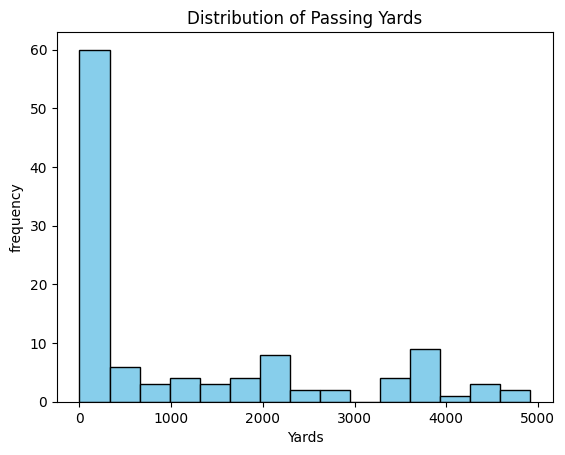

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://www.pro-football-reference.com/years/2024/passing.htm"

tables = pd.read_html(url)

df = tables[0]
df = df.drop(columns=["Rk", "Player", "Team", "Pos", "QBrec", "4QC", "GWD", "Awards"])

plt.hist(df["Yds"], bins=15, color="skyblue", edgecolor="black")
plt.title("Distribution of Passing Yards")
plt.xlabel("Yards")
plt.ylabel("frequency")
plt.show()

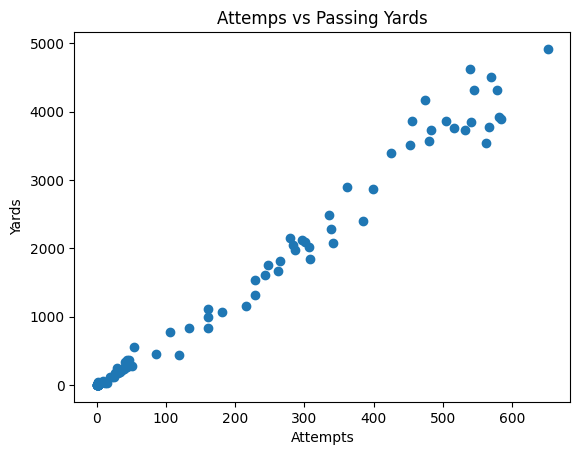

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://www.pro-football-reference.com/years/2024/passing.htm"

tables = pd.read_html(url)

df = tables[0]
df = df.drop(columns=["Rk", "Player", "Team", "Pos", "QBrec", "4QC", "GWD", "Awards"])

plt.scatter(df["Att"], df["Yds"])
plt.title("Attemps vs Passing Yards")
plt.xlabel("Attempts")
plt.ylabel("Yards")
plt.show()

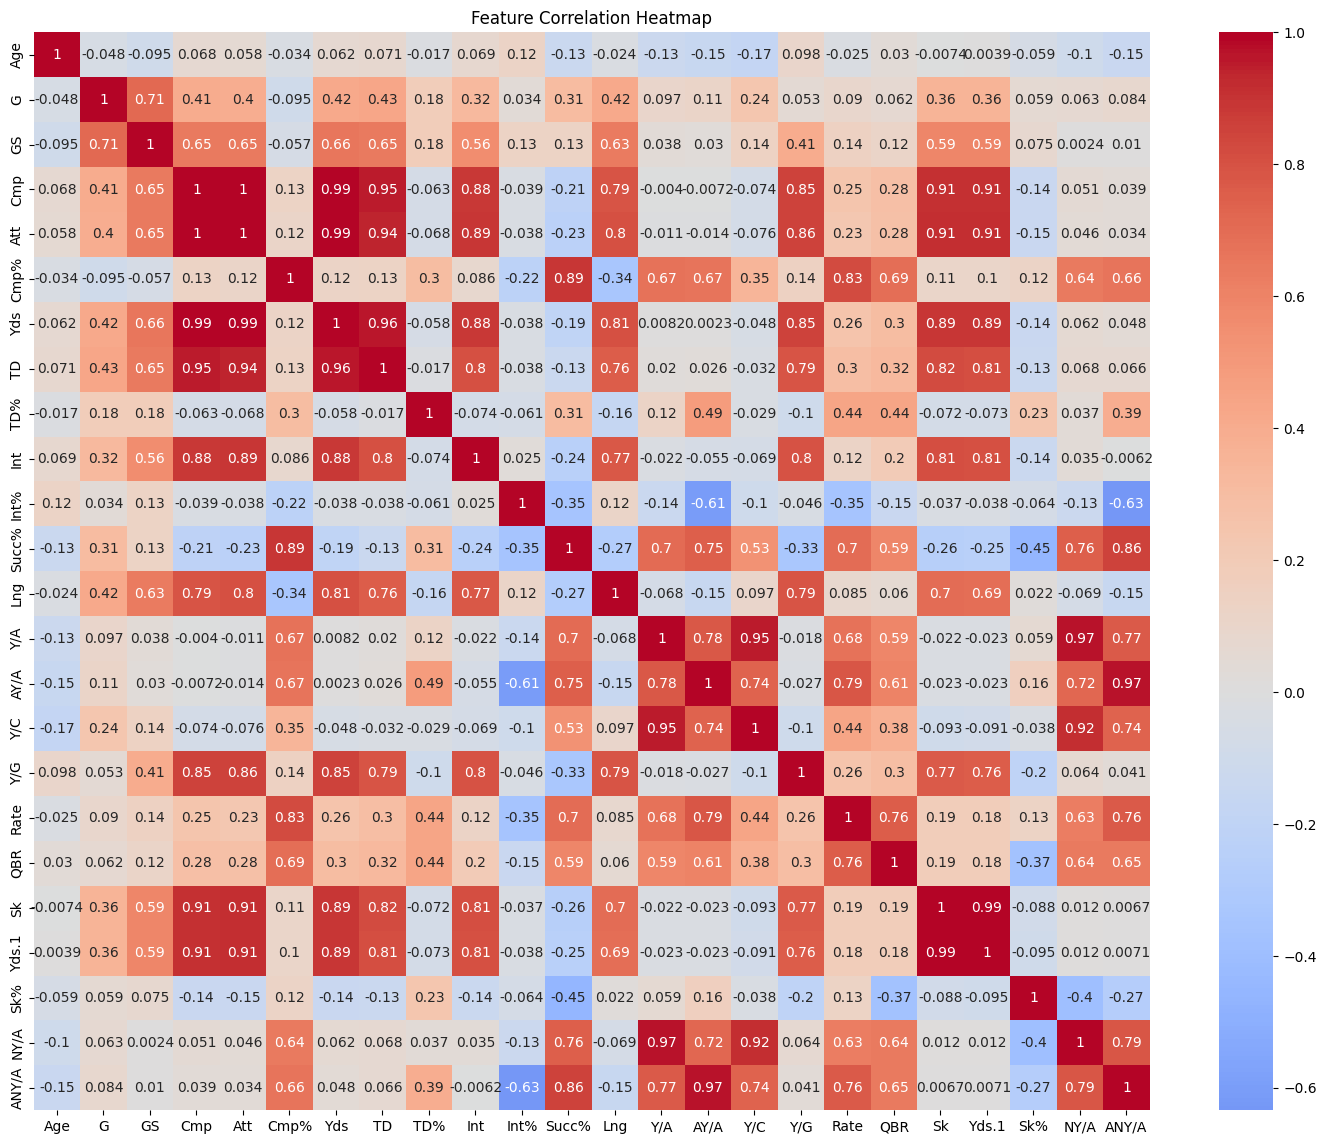

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://www.pro-football-reference.com/years/2024/passing.htm"

tables = pd.read_html(url)

df = tables[0]
df = df.drop(columns=["Rk", "Player", "Team", "Pos", "QBrec", "4QC", "GWD", "Awards", "1D", ])

numeric_df = df.select_dtypes(include="number")
corr = numeric_df.corr()
plt.figure(figsize=(18,14))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/qb_passing_2024.csv")

X = df.drop(columns=["Yds"])
y = df["Yds"]

n = 49
top_players = df.nlargest(n, "Yds")
X = top_players.drop(columns=["Yds"])
y = top_players["Yds"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# print("R2 score: ", r2_score(y_test, y_pred))
# print ("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted yards")
plt.ylabel("Residuals")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/qb_passing_2024.csv'

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load CSV directly (adjust path relative to notebook)
data_path = os.path.join("..", "data", "qb_passing_2024.csv")
data_path = os.path.abspath(data_path)
df = pd.read_csv(data_path)

# Create extra per-game stats
df["TDPerGame"] = df["TD"] / df["G"]
df["IntPerGame"] = df["Int"] / df["G"]
df["SkPerGame"] = df["Sk"] / df["G"]

# Split features and target
X = df.drop(columns=["Yds"])
y = df["Yds"]

# Train a temporary Random Forest for feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_names = X.columns
importances = rf.feature_importances_

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

print(feat_imp)

# Optional: plot
plt.figure(figsize=(8,6))
plt.barh(feat_imp["Feature"], feat_imp["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Gini)")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sajny/GitHub/data/qb_passing_2024.csv'